In [1]:
import config
import torch
import sys
sys.path.append('../util')
sys.path.append('../others_networks')
import time
from Trainer import Trainer
from util import measure_inference_speed, count_trainable_parameters
from DatasetReader import *

from DeepLabV3 import *

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
result_path = './DeepLabV3/'

In [2]:
# from util import compile_xls_best_results
# compile_xls_best_results(result_path, output_file="deeplabv3.xlsx")

In [3]:
num_classes = config.num_classes
in_channels = config.in_channels

train_loader, test_loader, val_loader = get_datasets(dataset_dir=config.dataset_path, 
                                              resolution=config.dataset_resolution, 
                                              batch_size=config.batch_size)

torch.Size([16, 3, 256, 256]) torch.Size([16, 1, 256, 256])


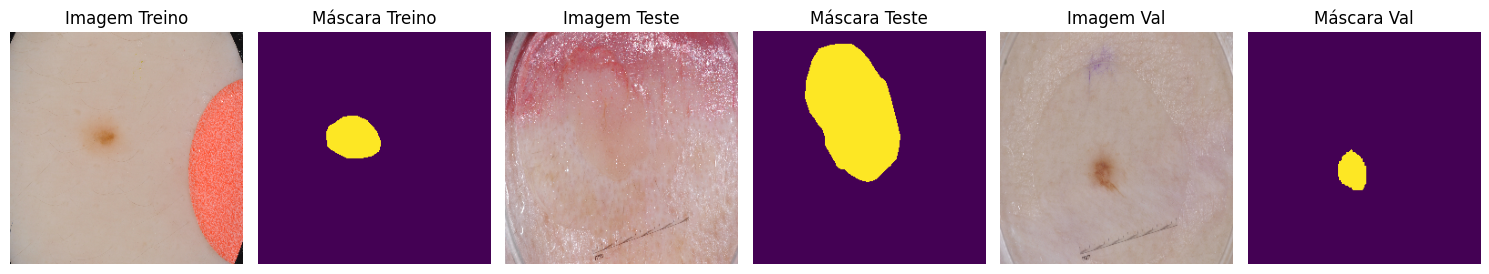

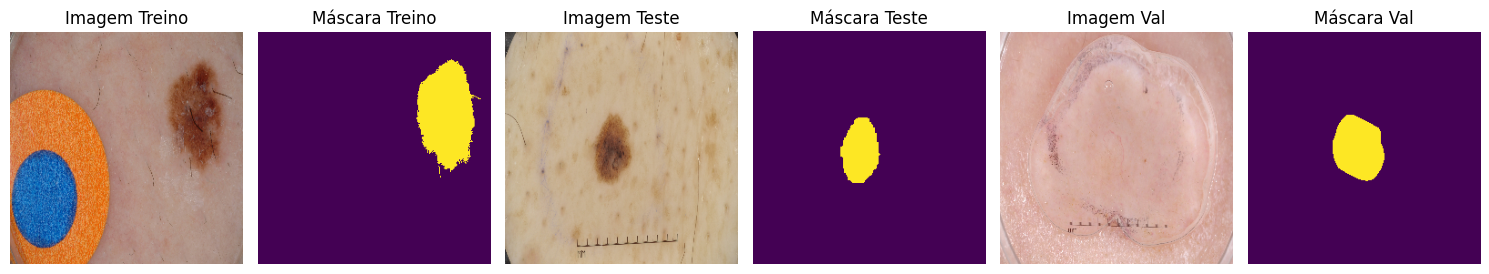

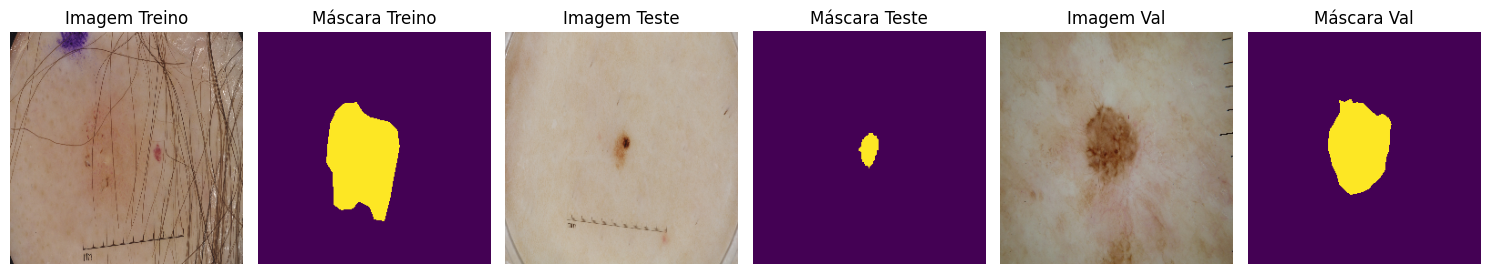

In [4]:
for (images_train, masks_train), (images_test, masks_test) in zip(train_loader, test_loader):
    print(images_train.shape, masks_train.shape)
    break

show_dataset_prev(train_loader, test_loader, val_loader, num_images=3)

In [4]:
def train(model, model_name):
    epochs = 300
    model_filename = f'{model_name}-epochs{epochs}.pth'
    trainer = Trainer(model_filename=model_filename,
                    model_dir=result_path, 
                    info={'weights':'DEFAULT'},
                    save_xlsx=True)
    model = trainer.train(model, train_loader, val_loader, test_loader,
                            num_epochs=epochs, 
                            save_every=1, 
                            continue_from_last=True,
                            learning_rate=1e-3,
                            verbose=1)
    model.to(device)


In [ ]:
model = DeepLabV3MobilenetV2Wrapper(in_channels=in_channels, out_channels=num_classes)
train(model,'DeepLabV3MobilenetV2Wrapper-1')

In [ ]:
model = DeepLabV3MobilenetV2Wrapper(in_channels=in_channels, out_channels=num_classes)
train(model,'DeepLabV3MobilenetV2Wrapper-2')

In [ ]:
model = DeepLabV3MobilenetV2Wrapper(in_channels=in_channels, out_channels=num_classes)
train(model,'DeepLabV3MobilenetV2Wrapper-3')